In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import time
%matplotlib notebook
sn.set_style("ticks",sn.axes_style({'axes.grid': True}))

In [3]:
random = np.loadtxt('Gravitationally_Rigid_Intergalactic_Dimensions_10k_random.dat')
data = np.loadtxt('Gravitationally_Rigid_Intergalactic_Dimensions_10k_data.dat')

rt = random.transpose()
dt = data.transpose()

In [17]:
rxpts = np.linspace(min(rt[0]),max(rt[0]),5)
rypts = np.linspace(min(rt[1]),max(rt[1]),5)
rzpts = np.linspace(min(rt[2]),max(rt[2]),5)

dxpts = np.linspace(min(rt[0]),max(rt[0]),5)
dypts = np.linspace(min(rt[1]),max(rt[1]),5)
dzpts = np.linspace(min(rt[2]),max(rt[2]),5)

In [37]:
test = list(enumerate(data))

In [77]:
# Here's an example
npts = 1000000
alldata = np.random.random((3,npts))

In [78]:
x,y,z = alldata[0],alldata[1],alldata[2]

In [79]:
divisions = [0, 0.25, 0.50, 0.75 ]
width = 0.25

In [82]:
#<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>#
master_list = {}

subdivisions = []

for a,i in enumerate(divisions):
    
    index_x0 = x>=i
    index_x1 = x< i+width

    for b,j in enumerate(divisions):
        
        index_y0 = y>=j
        index_y1 = y< j+width
        
        for c,k in enumerate(divisions):
        
            index_z0 = z>=k
            index_z1 = z< k+width
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            subdivisions.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            master_list[key] = [xsub,ysub,zsub]
#<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>#

In [83]:
for s in subdivisions:
    print(len(s[0]))

15580
15617
15601
15715
15618
15494
15542
15706
15586
15533
15506
15575
15669
15476
15405
15565
15634
15743
15594
15661
15745
15798
15784
15539
15814
15612
15526
15490
15703
15679
15338
15620
15591
15436
15775
15798
15680
15448
15434
15654
15690
15703
15692
15375
15578
15613
15762
15653
15703
15576
15718
15709
15594
15504
15695
15585
15939
15782
15588
15561
15652
15710
15610
15724


In [89]:
master_list['010101']

[array([ 0.35041091,  0.45935117,  0.27147394, ...,  0.26448427,
         0.29903925,  0.30530123]),
 array([ 0.32648622,  0.41664322,  0.30223332, ...,  0.35081182,
         0.25275977,  0.2717103 ]),
 array([ 0.36195344,  0.49218651,  0.28534002, ...,  0.36436088,
         0.34443728,  0.32044985])]

<IPython.core.display.Javascript object>


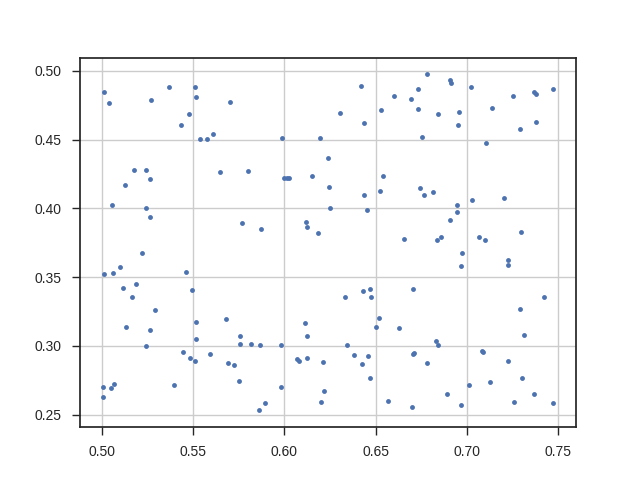

In [76]:
plt.figure()
plt.plot(subdivisions[45][0],subdivisions[45][2],'.' )